# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key

'4fde6dabfa77fadcaa1bf8593d61b6b7'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL

url="http://api.openweathermap.org/data/2.5/weather?"

unit = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = url + "appid=" + weather_api_key + "&q=" + city +"&units =" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    response=requests.get(city_url).json()
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =response["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | monrovia
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | callao
Processing Record 14 of Set 1 | axim
Processing Record 15 of Set 1 | greenville
Processing Record 16 of Set 1 | kamiiso
Processing Record 17 of Set 1 | chernyshevskiy
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | lincoln
Processing Record 21

Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | papatowai
Processing Record 40 of Set 4 | bani walid
Processing Record 41 of Set 4 | huarmey
Processing Record 42 of Set 4 | roanoke rapids
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | colonia
Processing Record 45 of Set 4 | flying fish cove
Processing Record 46 of Set 4 | pornic
Processing Record 47 of Set 4 | lashio
Processing Record 48 of Set 4 | faro
Processing Record 49 of Set 4 | tazacorte
Processing Record 0 of Set 5 | ambovombe
Processing Record 1 of Set 5 | naryn
Processing Record 2 of Set 5 | dunedin
Processing Record 3 of Set 5 | kushiro
Processing Record 4 of Set 5 | naze
Processing Record 5 of Set 5 | tariba
Processing Record 6 of Set 5 | kingston
Processing Record 7 of Set 5 | lodja
Processing Record 8 of Set 5 | kolonia town
Processing Record 9 of Set 5 | winchester
Processing Record 10 of Set 5 | chamical
Processing Record 11 of Set 5 | olonkinbyen
Processing Record 12 of 

Processing Record 31 of Set 8 | mahina
Processing Record 32 of Set 8 | serdobsk
Processing Record 33 of Set 8 | whitney
Processing Record 34 of Set 8 | qui nhon
Processing Record 35 of Set 8 | palotina
Processing Record 36 of Set 8 | kabare
Processing Record 37 of Set 8 | svetlyy
Processing Record 38 of Set 8 | praia da vitoria
Processing Record 39 of Set 8 | manta
Processing Record 40 of Set 8 | gobabis
Processing Record 41 of Set 8 | manikpur
Processing Record 42 of Set 8 | puerto baquerizo moreno
Processing Record 43 of Set 8 | iskateley
Processing Record 44 of Set 8 | bloomfield
Processing Record 45 of Set 8 | verkhnevilyuysk
Processing Record 46 of Set 8 | angaur state
Processing Record 47 of Set 8 | arcachon
Processing Record 48 of Set 8 | queenstown
Processing Record 49 of Set 8 | east london
Processing Record 0 of Set 9 | cabinda
Processing Record 1 of Set 9 | leava
Processing Record 2 of Set 9 | recani
Processing Record 3 of Set 9 | carnarvon
Processing Record 4 of Set 9 | cho

Processing Record 21 of Set 12 | virginia beach
Processing Record 22 of Set 12 | zhigalovo
Processing Record 23 of Set 12 | zangguy
City not found. Skipping...
Processing Record 24 of Set 12 | zoucheng
Processing Record 25 of Set 12 | kavieng
Processing Record 26 of Set 12 | muravlenko
Processing Record 27 of Set 12 | tanjungagung
Processing Record 28 of Set 12 | petropavlivka
Processing Record 29 of Set 12 | cozumel
Processing Record 30 of Set 12 | carloforte
Processing Record 31 of Set 12 | mogoytuy
Processing Record 32 of Set 12 | pariaman
Processing Record 33 of Set 12 | road town
Processing Record 34 of Set 12 | rudnya
Processing Record 35 of Set 12 | sao felix do xingu
Processing Record 36 of Set 12 | sake
Processing Record 37 of Set 12 | pibor
City not found. Skipping...
Processing Record 38 of Set 12 | minas de marcona
Processing Record 39 of Set 12 | nguigmi
Processing Record 40 of Set 12 | paragominas
Processing Record 41 of Set 12 | pind dadan khan
Processing Record 42 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,284.36,89,77,0.89,ZA,1689841048
1,lihue,21.9789,-159.3672,300.73,82,100,9.26,US,1689841048
2,hamilton,39.1834,-84.5333,295.91,94,0,2.06,US,1689840799
3,port-aux-francais,-49.3500,70.2167,278.84,88,95,20.81,TF,1689841048
4,vila franca do campo,37.7167,-25.4333,294.38,83,92,1.09,PT,1689841048


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

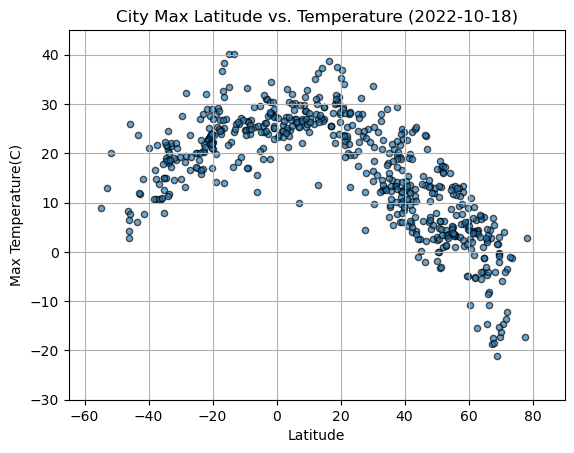

In [67]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat",y="Max Temp", kind="scatter",
                  title="City Max Latitude vs. Temperature (2022-10-18)",
                  grid=True,
                  xlim=(-65,90),
                  ylim=(-30,45),
                 xlabel="Latitude", 
                  ylabel="Max Temperature(C)",
                 facecolor="blue",
                 edgecolor="black",
                 alpha=0.65)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig11.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

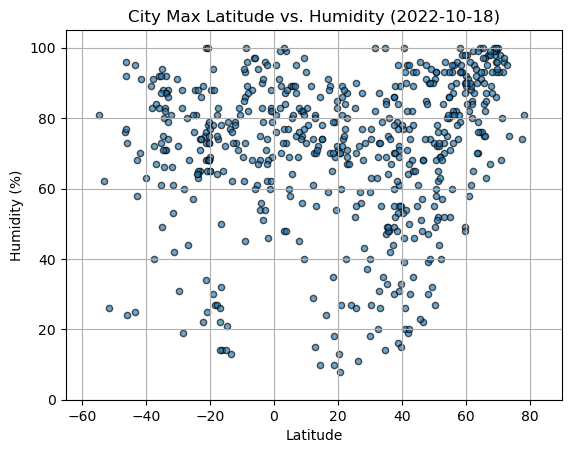

In [68]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(x="Lat",y="Humidity", kind="scatter",
                  title="City Max Latitude vs. Humidity (2022-10-18)",
                  grid=True,
                  xlim=(-65,90),
                  ylim=(0,105),
                 xlabel="Latitude", 
                  ylabel="Humidity (%)",
                 facecolor="blue",
                 edgecolor="black",
                 alpha=0.65)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig13.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

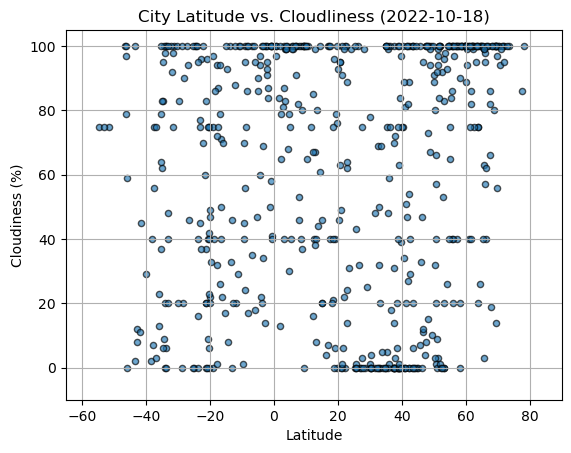

In [69]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(x="Lat",y="Cloudiness", kind="scatter",
                  title="City Latitude vs. Cloudliness (2022-10-18)",
                  grid=True,
                  xlim=(-65,90),
                  ylim=(-10,105),
                 xlabel="Latitude", 
                  ylabel="Cloudiness (%)",
                 facecolor="blue",
                 edgecolor="black",
                 alpha=0.65)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig14.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

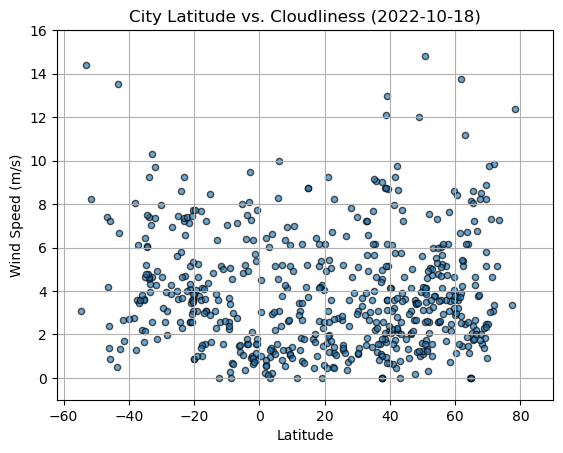

In [70]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(x="Lat",y="Wind Speed", kind="scatter",
                  title="City Latitude vs. Cloudliness (2022-10-18)",
                  grid=True,
                  xlim=(-62,90),
                  ylim=(-1,16),
                 xlabel="Latitude", 
                  ylabel="Wind Speed (m/s)",
                 facecolor="blue",
                 edgecolor="black",
                 alpha=0.65)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig15.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def north(x,y,z):
    x_values = northern_hemi_df['Lat']
    y_values = northern_hemi_df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,z),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y)
    print(f"the r-value is: {rvalue}")
    plt.show()
    
def south(x,y,z):
    x_values = southern_hemi_df['Lat']
    y_values = southern_hemi_df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,z),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y)
    print(f"the r-value is: {rvalue}")
    plt.show()
    

    



In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=(city_data_df.loc[city_data_df["Lat"]>=0])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=(city_data_df.loc[city_data_df["Lat"]<=0])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: -0.8462548186825364


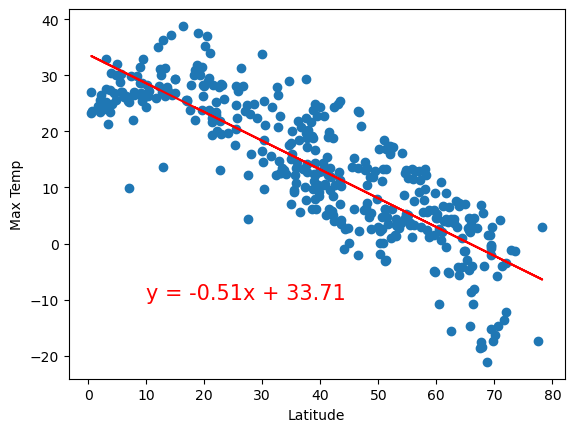

In [74]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
north(x=10,y="Max Temp",z=-10)


the r-value is: 0.6419546065421801


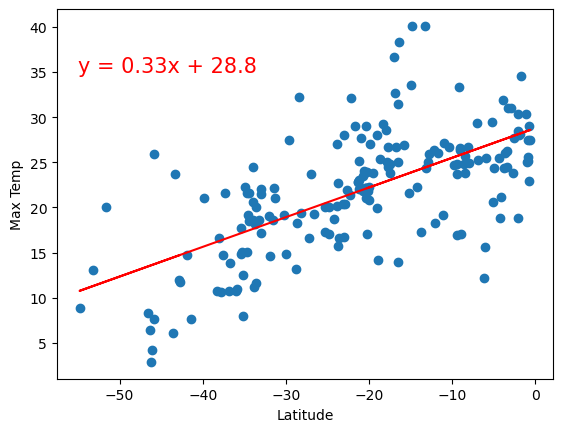

In [76]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
south(x=-55,y="Max Temp",z=35)


The linear regression shows us that there is a negative  relation on North graph and a positive relation in  the south graph bitween latitude and Max temp.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.2385317912939407


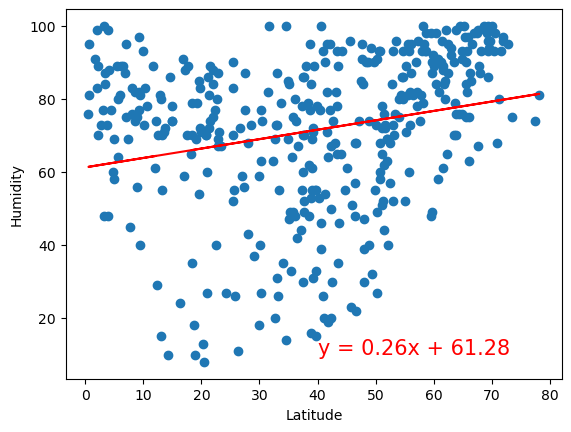

In [80]:
# Northern Hemisphere
# YOUR CODE HERE
north(x=40,y="Humidity",z=10)


the r-value is: 0.016759316950056818


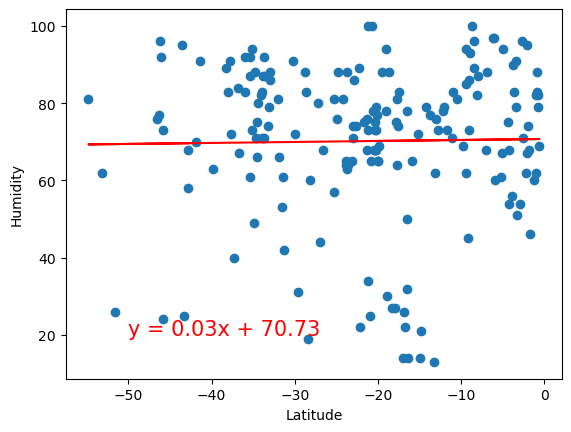

In [79]:
# Southern Hemisphere
# YOUR CODE HERE
south(x=-50,y="Humidity",z=20)


We can see north has a positive relation where as south looks constant on linear regression for Humidity vs latitude

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.155004893876971


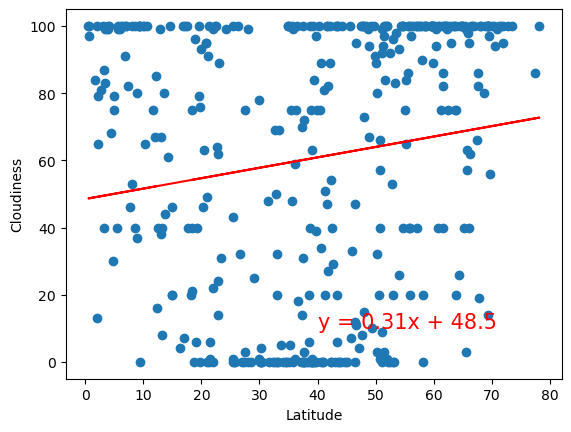

In [82]:
# Northern Hemisphere
# YOUR CODE HERE
north(x=40,y="Cloudiness",z=10)


the r-value is: 0.14341322916643243


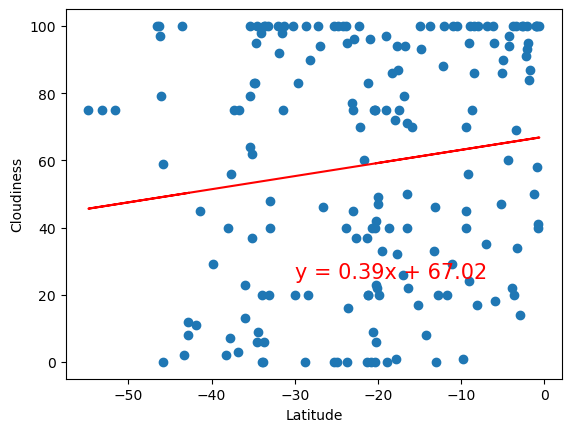

In [84]:
# Southern Hemisphere
# YOUR CODE HERE
south(x=-30,y="Cloudiness",z=25)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.1743466729090334


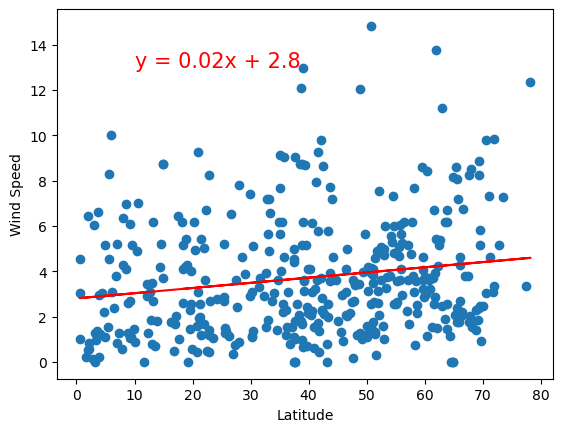

In [87]:
# Northern Hemisphere
# YOUR CODE HERE
north(x=10,y="Wind Speed",z=13)


the r-value is: -0.24947753546264592


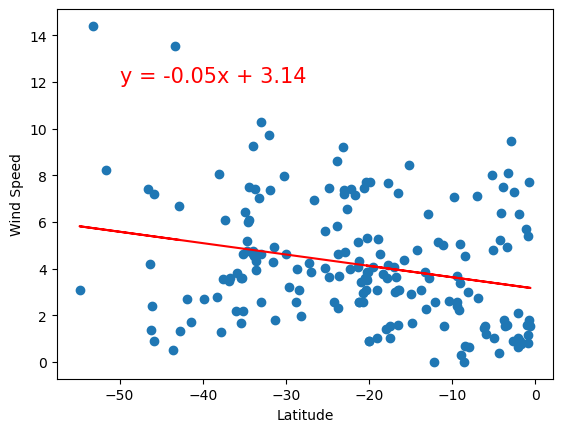

In [89]:
# Southern Hemisphere
# YOUR CODE HERE
south(x=-50,y="Wind Speed",z=12)


For norht the relation is positive and for north the relation is Negative for  wind spped vs latitude